In [49]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt 
import seaborn as sns

In [50]:
df = pd.read_csv('data.csv')

In [52]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


### EDA

In [5]:
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [6]:
df.shape

(381109, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [8]:
#distribution of target variable
df['Response'].value_counts(normalize=True)

Response
0    0.877437
1    0.122563
Name: proportion, dtype: float64

In [9]:
# univariate analysis
df.groupby(by = 'Gender')['Response'].value_counts()

Gender  Response
Female  0           156835
        1            18185
Male    0           177564
        1            28525
Name: count, dtype: int64

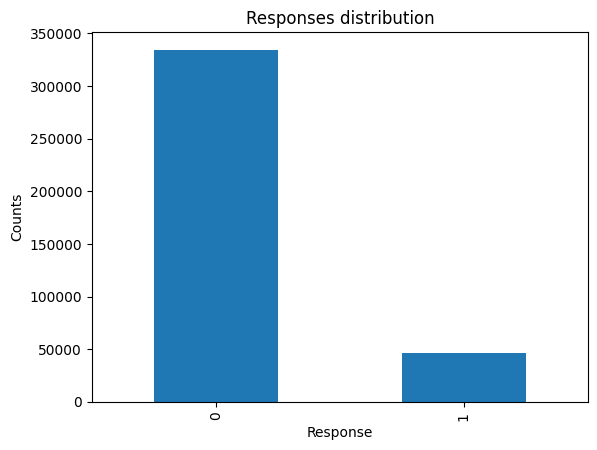

In [10]:
value_counts = df['Response'].value_counts()

value_counts.plot(kind = 'bar')
plt.xlabel('Response')
plt.ylabel('Counts')
plt.title('Responses distribution')
plt.show()

<Axes: xlabel='Age', ylabel='Count'>

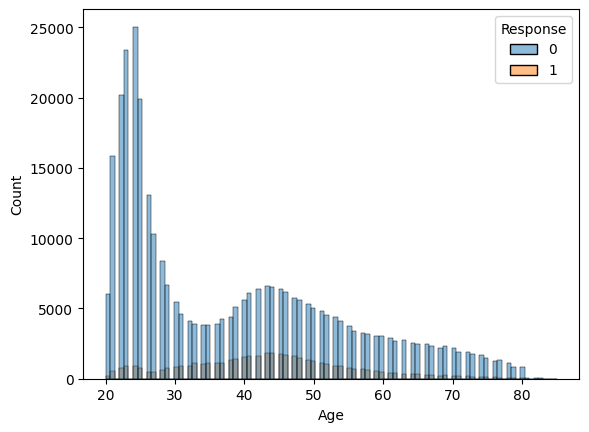

In [11]:
sns.histplot(x= df['Age'],hue = df['Response'])

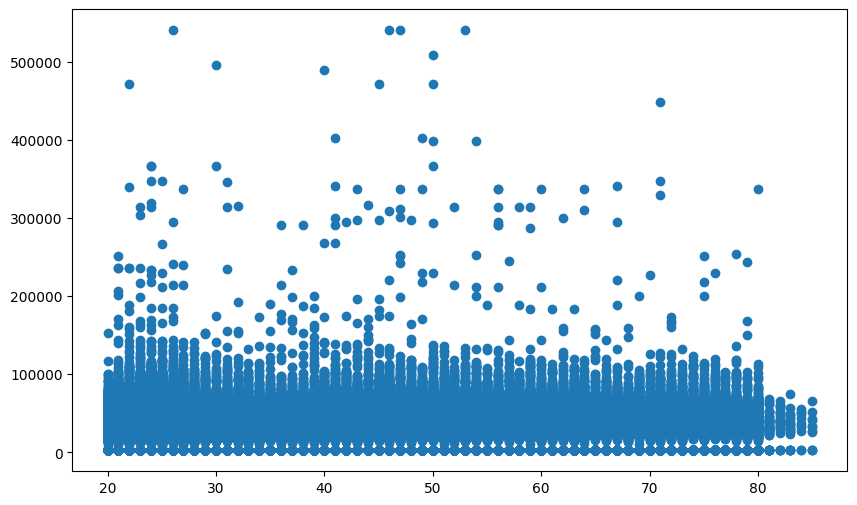

In [12]:
# age vs annual income

plt.figure(figsize=(10,6))
plt.scatter(x = df['Age'], y = df['Annual_Premium'])
plt.show()

In [31]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


<Axes: xlabel='Gender', ylabel='count'>

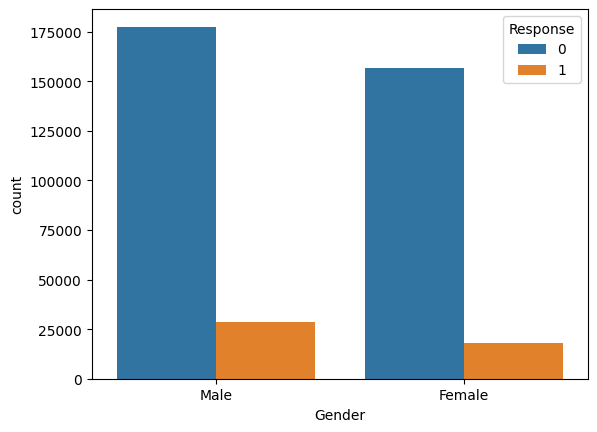

In [32]:
sns.countplot(x = 'Gender', hue = 'Response', data = df)

In [44]:
grouped = df.groupby(['Response','Gender']).size().reset_index(name = 'count')

<Axes: xlabel='Response', ylabel='count'>

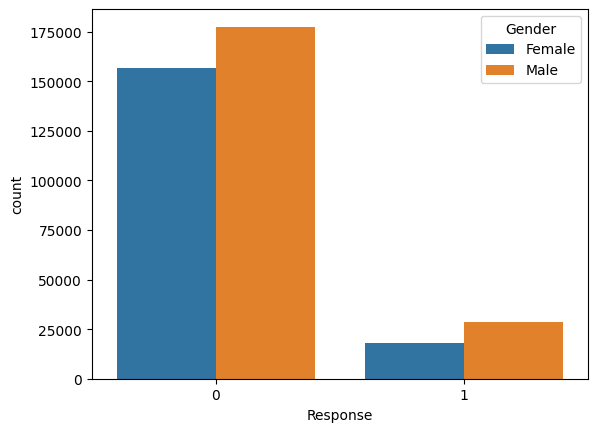

In [47]:
sns.barplot(x= 'Response', y='count', hue = 'Gender', data = grouped)

In [79]:
group_df = df.groupby(['Response','Driving_License']).size().reset_index(name = 'count')
# group_df['percent'] = group_df.groupby('Response')['count']
group_df['percent'] = group_df.groupby(by ='Response')['count'].transform(lambda x: 100*x/x.sum())
group_df

,Response,Driving_License,count,percent
0,0,0,771,0.230563
1,0,1,333628,99.769437
2,1,0,41,0.087776
3,1,1,46669,99.912224


In [92]:
def catplot(X,Y,df):
    """ 
    Plot a categorical vs categorical plot
    x: Target variable for eg. Response here
    """
    group_df = df.groupby([X,Y]).size().reset_index(name = 'count')
    group_df['percent'] = group_df.groupby(X)['count'].transform(lambda X: 100*X/X.sum())

    plt.figure(figsize=(8,5))
    ax = sns.barplot(x = X, y = 'percent', hue = Y, data = group_df)

    for p in ax.patches:
        ax.annotate(f"{p.get_height():.1f}%", 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha="center", va="bottom", fontsize=9, color="black")
        
    plt.legend(title=Y)
    plt.ylabel("Percentage")
    plt.title(f"{X} vs {Y} (%)")
    plt.show()


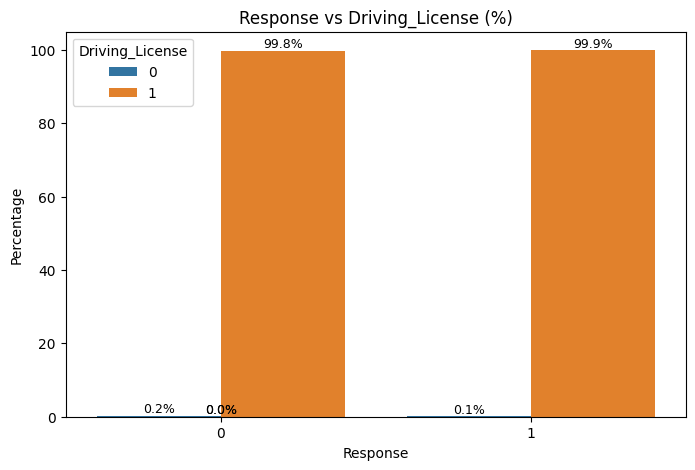

In [93]:
catplot('Response', 'Driving_License', df)

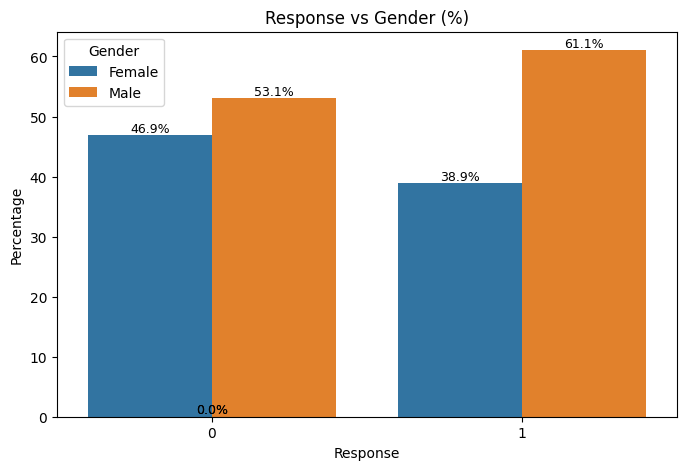

In [94]:
catplot('Response', 'Gender', df)


In [95]:
df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

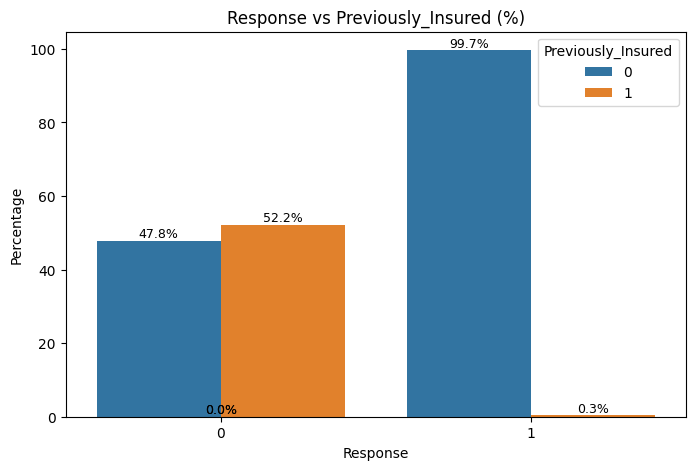

In [96]:
catplot('Response', 'Previously_Insured', df)

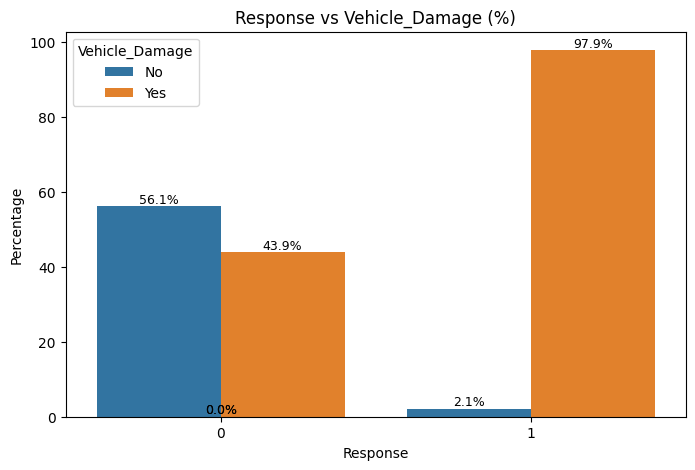

In [98]:
catplot('Response', 'Vehicle_Damage', df)

In [105]:
df['Region_Code'].nunique()

53

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                381109 non-null  object 
 1   Age                   381109 non-null  int64  
 2   Driving_License       381109 non-null  int64  
 3   Region_Code           381109 non-null  float64
 4   Previously_Insured    381109 non-null  int64  
 5   Vehicle_Age           381109 non-null  object 
 6   Vehicle_Damage        381109 non-null  object 
 7   Annual_Premium        381109 non-null  float64
 8   Policy_Sales_Channel  381109 non-null  float64
 9   Vintage               381109 non-null  int64  
 10  Response              381109 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 32.0+ MB


In [137]:
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [138]:
num_cols = ['Age', 'Driving_License', 'Previously_Insured', 'Annual_Premium', 'Vintage']

cat_cols = ['Gender','Vehicle_Age','Vehicle_Damage','Policy_Sales_Channel']

In [139]:
#finding correlation between annual premium and response to answer the effect of premium amount on response

df[['Annual_Premium','Response']].corr()

,Annual_Premium,Response
Annual_Premium,1.000000,0.022575
Response,0.022575,1.000000


In [ ]:
region_stats = df.groupby(by = 'Region_Code')['Response'].agg(region_codes = 'count', positive_response = 'sum').sort_values(by = 'region_codes', ascending=False).reset_index()

In [157]:
region_stats['conversion_rate'] = region_stats['positive_response']/region_stats['region_codes']*100

In [167]:
from scipy.stats import shapiro, kstest, anderson
stat, p = shapiro(df['Annual_Premium'])
print(f"Shapiro-Wilk Test: stat={stat:.3f}, p={p:.3f}")

Shapiro-Wilk Test: stat=0.873, p=0.000


c:\Users\suryap.shekhawat\Downloads\ss\Vehicle-Insurance-End2End\vehicle\Lib\site-packages\scipy\stats\_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 381109.
  res = hypotest_fun_out(*samples, **kwds)


<Axes: ylabel='Annual_Premium'>

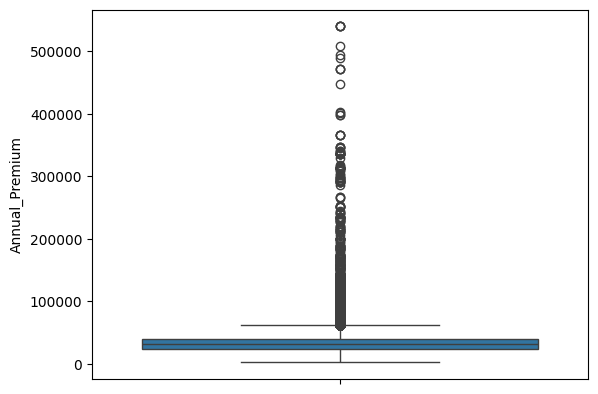

In [168]:
sns.boxplot(df['Annual_Premium'])

In [172]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
X_train['Annual_Premium_trans'] = pt.fit_transform(X_train[['Annual_Premium']])


In [178]:
from sklearn.preprocessing import RobustScaler
rb = RobustScaler()
X_train['annual_premium_robust'] = rb.fit_transform(X_train[['Annual_Premium']])

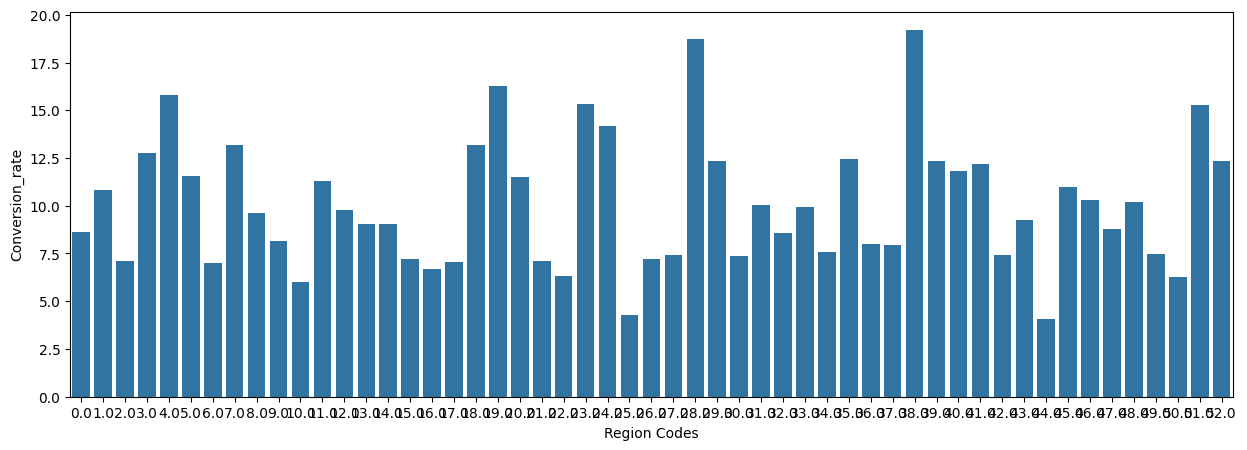

In [162]:
plt.figure(figsize=(15,5))
sns.barplot(data = region_stats, x = 'Region_Code', y = 'conversion_rate')
plt.xlabel('Region Codes')
plt.ylabel('Conversion_rate')
plt.show()

In [114]:
categorical_df = df[cat_cols]

## Preprocessing

In [54]:
df = df.drop(columns = 'id')

In [55]:
y = df['Response']
X = df.drop(columns = 'Response')

In [53]:
df['Region_Code'] = df['Region_Code'].astype(str)
df['Policy_Sales_Channel'] = df['Policy_Sales_Channel'].astype(str)

In [56]:
print(X.shape)
print(y.shape)

(381109, 10)
(381109,)


In [104]:
#importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from category_encoders import TargetEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state= 42)

In [142]:
num_cols_binary = ['Driving_License', 'Previously_Insured']                
num_cols_standard = ['Age', 'Vintage']
num_cols_minmax =  ['Annual_Premium']
cat_cols_ohe = ['Gender','Vehicle_Age','Vehicle_Damage']
# cat_cols_target = ['Policy_Sales_Channel', 'Region_Code']


In [108]:
num_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

minmax_pipeline = Pipeline([
    ('robust', MinMaxScaler())
])

ohe_pipeline = Pipeline([
    ('ohe', OneHotEncoder(drop = 'first', handle_unknown='ignore'))
])

target_pipeline = Pipeline([
    ('target', TargetEncoder())
])

In [109]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, num_cols_standard),
        ('robust', minmax_pipeline, num_cols_minmax),
        ('ohe', ohe_pipeline, cat_cols_ohe),
        ('target', target_pipeline, cat_cols_target),
        ('passthrough', 'passthrough', num_cols_binary)   # leave binary vars as they are
    ]
)

In [110]:
X_train_transformed = pd.DataFrame(preprocessor.fit_transform(X_train, y_train), columns = preprocessor.get_feature_names_out())


In [111]:
X_train_transformed.rename(columns ={'ohe__Vehicle_Age_< 1 Year':'ohe_vehicle_age_lt_1', 'ohe__Vehicle_Age_> 2 Years' : 'ohe_vehicle_age_mt_2'},inplace = True)

In [112]:
X_test_transformed = pd.DataFrame(preprocessor.transform(X_test), columns = preprocessor.get_feature_names_out())

In [113]:
X_test_transformed.rename(columns = {'ohe__Vehicle_Age_< 1 Year':'ohe_vehicle_age_lt_1', 'ohe__Vehicle_Age_> 2 Years' : 'ohe_vehicle_age_mt_2'},inplace = True)

In [114]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [115]:
clfs = {
    'lr' : LogisticRegression(),
    'dtc' : DecisionTreeClassifier(max_depth=5,class_weight='balanced'),
    'rf' : RandomForestClassifier(max_depth= 5,class_weight='balanced'),
    'gbc' : GradientBoostingClassifier(max_depth= 5),
    'xbg' : XGBClassifier()

}

In [116]:
from sklearn.metrics import accuracy_score, precision_score
def train_classifiers(clfs, X_train, X_test, y_train, y_test):
    model = clfs.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    return accuracy, precision


In [117]:
model_report = {}
for model_name, classifiers in clfs.items():
    current_accuracy, current_precision = train_classifiers(classifiers, X_train_transformed, X_test_transformed, y_train, y_test)
    print(f"{model_name} accuracy score", current_accuracy)
    print(f"{model_name} precision score", current_precision)

    model_report[model_name] = {
        'accuracy' : current_accuracy,
        'precision' : current_precision
    }
    print("===============")

lr accuracy score 0.8748917635328383
lr precision score 0.43157894736842106
dtc accuracy score 0.7074860276560573
dtc precision score 0.28826708218678515
rf accuracy score 0.6962031959276849
rf precision score 0.2832660328765381
gbc accuracy score 0.8750623179659416
gbc precision score 0.5
xbg accuracy score 0.8749573613917242
xbg precision score 0.49230769230769234


In [121]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [123]:
param_grid = {
    'penalty': ['l1', 'l2',],
    'C': [0.001, 0.01, 0.1, 1, 10],
    'class_weight': [None, 'balanced']
}

In [124]:
logistic = LogisticRegression(solver = 'saga',max_iter = 100)

In [129]:
grid_df = GridSearchCV(logistic, cv = 5, param_grid=param_grid,scoring='accuracy',verbose=True, n_jobs=-1)
grid_df.fit(X_train_transformed, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


,estimator,LogisticRegre...solver='saga')
,param_grid,"{'C': [0.001, 0.01, ...], 'class_weight': [None, 'balanced'], 'penalty': ['l1', 'l2']}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,True
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l1'


In [130]:
grid_df.best_params_

{'C': 0.001, 'class_weight': None, 'penalty': 'l1'}

In [131]:
grid_df.best_score_

np.float64(0.8780302210893842)

In [149]:
model = LogisticRegression()

In [150]:
model.fit(X_train_transformed, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [151]:
y_pred = model.predict(X_test_transformed)

In [152]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

In [153]:
print(accuracy)
print(precision)

0.8748917635328383
0.43157894736842106
